In [127]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [257]:
from __future__ import division
from glob import glob
import os
import time
import cPickle as pickle

import scipy.linalg
import scipy.stats

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc("figure", dpi=144)

import astropy.io.fits
import astropy.table
import astropy.units as u
import astropy.constants as c
import astropy.time

import emcee
import numdifftools

import kepler
import threebody

import logging
logger = logging.getLogger()
#logger.setLevel(logging.DEBUG)
logger.setLevel(logging.INFO)
logging.debug("test")

In [129]:
!ls -ltr *.tim

-rw-r--r-- 1 aarchiba aipsuser     3194 May 31  2013 0337-short-2.tim
-rw-r--r-- 1 aarchiba aipsuser  1709289 May 31  2013 0337+17.tim
-rw-r--r-- 1 aarchiba aipsuser    10646 May 31  2013 0337-short.tim
-rw-r--r-- 1 aarchiba aipsuser  1870476 Jun 17  2013 0337+17-scott-2013-06-06.tim
-rw-r--r-- 1 aarchiba aipsuser  6961347 Jul 31  2013 synthetic.tim
-rw-r--r-- 1 aarchiba aipsuser  1977505 Aug 15  2013 0337+17-scott-2013-08-15.tim
-rw-r--r-- 1 aarchiba aipsuser  2043963 Aug 30  2013 0337+17-scott-2013-08-29.tim
-rw-r--r-- 1 aarchiba aipsuser  1590000 Sep 19  2013 fake-pulsar.tim
-rw-r--r-- 1 aarchiba aipsuser  2078907 Jan 22  2014 0337+17-scott-2014-01-22.tim
-rw-r--r-- 1 aarchiba aipsuser  2201549 Jan 28  2014 0337+17-anne-2014-01-28.tim
-rw-r--r-- 1 aarchiba aipsuser      154 Feb  4  2014 0337+17-anne-2014-02-04.tim
-rw-r--r-- 1 aarchiba aipsuser  2186806 Feb  4  2014 0337+17-anne-2014-02-04b.tim
-rw-r--r-- 1 aarchiba aipsuser  2143978 Feb 10  2014 fake-t2.tim
-rw-r--r-- 1 aarchiba ai

## Assign pulse numbers using a three-body solution

In [188]:
fpickle = "forecaster_params.pickle"
best_parameters = pickle.load(open(
    "forecaster_best_parameters.pickle","rb"))
d = pickle.load(open(fpickle,"rb"))
F = threebody.Fitter(**d)
F.best_parameters.update(best_parameters)
d

DEBUG:threebody:Fitting DM
DEBUG:threebody:base telescope AO_1400 from list of ['AO_1400', 'AO_430', 'GBT_1400', 'WSRT_1400', 'WSRT_350']


{'efac': 1,
 'files': 'tuned_mueller_pulses_selected',
 'fit_pm': True,
 'fit_pos': True,
 'fit_px': True,
 'general': True,
 'kopeikin': False,
 'linear_dm': True,
 'linear_jumps': True,
 'matrix_mode': 0,
 'only_tels': None,
 'parfile': '0337_tempo2_px_optical.par',
 'ppn_mode': 'GR',
 'priors': (),
 'reference_f0': 365.95336876828094,
 'shapiro': True,
 'special': True,
 't2_astrometry': True,
 'toa_mode': 'pipeline',
 'tol': 1e-16,
 'tzrmjd_middle': 'auto',
 'use_quad': False}

In [171]:
# FIXME: jumps
o = threebody.compute_orbit(F.best_parameters, F.mjds)

DEBUG:threebody:Running compute_orbit with parameter_dict {'ppn_mode': 'GR', 'j_WSRT_350': 0.20126238634566302967, 'f1': -1.1775460187161637726e-15, 'asini_i': 1.2175268328187250986, 'eps2_i': -9.1322420630293142815e-05, 'delta_lan': -3.0460572022280719438e-05, 'eps2_o': -0.003462206702875036605, 'asini_o': 74.672695837636610457, 'j_GBT350': 1.8510494219682503864e-05, 'dgamma': 1.175749501990592583e-06, 'acosi_o': 91.530732348852743868, 'acosi_i': 1.4922596784609649978, 'd_DM': -1.0783014070715655203, 'tol': 1e-16, 'd_PMRA': -1.6156497397772333995e-08, 'use_quad': False, 'j_GBT820': 6.7999885696179984064e-05, 'd_PX': 225.12028703313806527, 'j_AO327': 6.5301884179095320452e-05, 'd_DECJ': 0.00011791778446902077384, 'delta': -3.1672615080429307528e-06, 'j_AO1350': 5.4169010371405938449e-05, 'dbeta': -0.00041698493776006720714, 'pb_o': 327.25749258285365256, 'j_GBT_1400': -0.0033004565502410428192, 'pb_i': 1.6293969558060391417, 'j_GBT1500': 6.2334158805205982467e-05, 'f0': 365.95336315626

In [189]:
best_parameters

{'acosi_i': 1.4922596784609649978,
 'acosi_o': 91.530732348852743868,
 'asini_i': 1.2175268328187250986,
 'asini_o': 74.672695837636610457,
 'd_DECJ': 0.00011791778446902077384,
 'd_DM': -1.0783014070715655203,
 'd_PMDEC': -2.8823345082357366353e-09,
 'd_PMRA': -1.6156497397772333995e-08,
 'd_PX': 225.12028703313806527,
 'd_RAJ': -2.9337154238531575435e-05,
 'dbeta': -0.00041698493776006720714,
 'delta': -3.1672615080429307528e-06,
 'delta_lan': -3.0460572022280719438e-05,
 'dgamma': 1.175749501990592583e-06,
 'eps1_i': 0.00068692611243786728556,
 'eps1_o': 0.035186244412656308993,
 'eps2_i': -9.1322420630293142815e-05,
 'eps2_o': -0.003462206702875036605,
 'f0': 365.95336315626575005,
 'f1': -1.1775460187161637726e-15,
 'general': True,
 'j_AO1350': 5.4169010371405938449e-05,
 'j_AO1440': 4.8930549945746121983e-05,
 'j_AO327': 6.5301884179095320452e-05,
 'j_AO_430': 0.20719659133904051173,
 'j_GBT1500': 6.2334158805205982467e-05,
 'j_GBT350': 1.8510494219682503864e-05,
 'j_GBT820': 6.

In [172]:
t_psr_s = o['t_psr']*86400
p = F.best_parameters
tzrmjd_base = p['tzrmjd_base']
tzrmjd_s = (p['tzrmjd']+(tzrmjd_base-F.base_mjd))*86400
phase = p['f0']*t_psr_s+p['f1']*t_psr_s**2/2.
phase -= p['f0']*tzrmjd_s+p['f1']*tzrmjd_s**2/2.

KeyError: 'tzrmjd_base'

In [ ]:
plt.hist(phase-np.round(phase),bins=100)
print np.sum(np.abs(phase-np.round(phase)>0.3)), "questionable entries"

## Loading in pipeline tim files

In [331]:
processing_name = "tuned2"
toa_name = "aligned"
fpickle = "forecaster_params.pickle"
d = pickle.load(open(fpickle,"rb"))
d["files"] = "%s_%s" % (processing_name, toa_name)
d["toa_mode"] = "pipeline"
F = threebody.Fitter(**d)
F.best_parameters = best_parameters.copy()
d

INFO:threebody:tempo2 output appears to be old, deleting to trigger recomputation


{'efac': 1,
 'files': 'tuned2_aligned',
 'fit_pm': True,
 'fit_pos': True,
 'fit_px': True,
 'general': True,
 'kopeikin': False,
 'linear_dm': True,
 'linear_jumps': True,
 'matrix_mode': 0,
 'only_tels': None,
 'parfile': '0337_tempo2_px_optical.par',
 'ppn_mode': 'GR',
 'priors': (),
 'reference_f0': 365.95336876828094,
 'shapiro': True,
 'special': True,
 't2_astrometry': True,
 'toa_mode': 'pipeline',
 'tol': 1e-16,
 'tzrmjd_middle': 'auto',
 'use_quad': False}

In [332]:
for t in F.jnames:
    if t not in F.best_parameters:
        print t
        F.best_parameters[t] = 0

j_AO_350


In [333]:
toa_info = threebody.read_t2_toas(F.files+".tim")
len(toa_info)

33971

In [334]:
if F.pulses is None:
    F.pulses = np.zeros(len(F.mjds),dtype=np.int64)

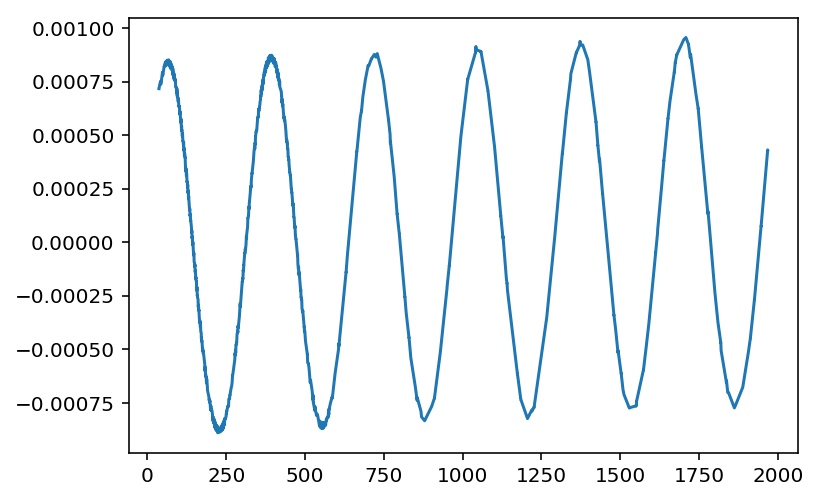

In [335]:
o = F.compute_orbit(F.best_parameters)
plt.plot(F.mjds, F.mjds-o["t_psr"])

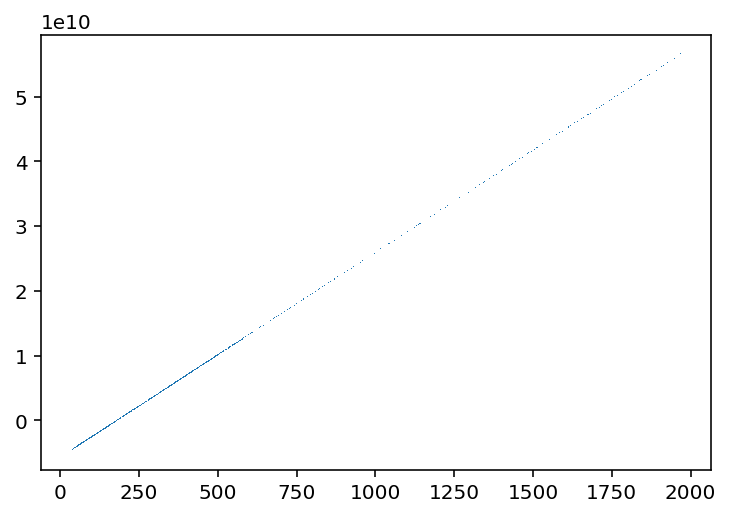

In [336]:
r = F.residuals(F.best_parameters, linear_fit=False)
plt.plot(F.mjds,r, ",")

In [337]:
F.pulses += np.round(r).astype(np.int64)

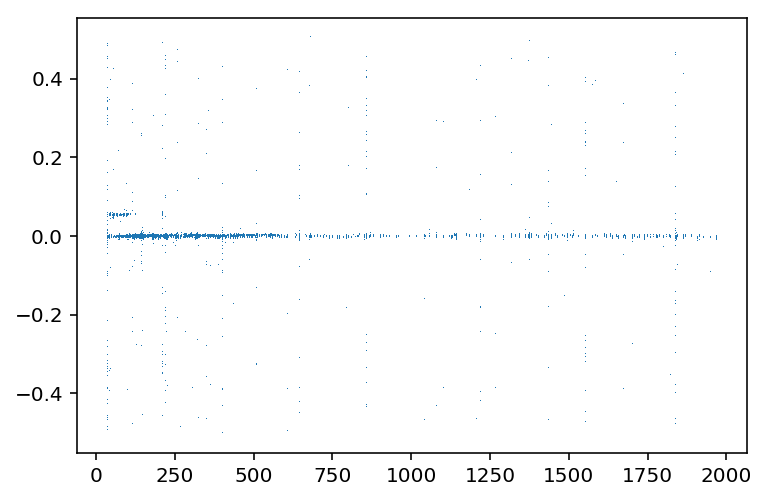

In [338]:
r = F.residuals(F.best_parameters)
res = r

plt.plot(F.mjds,res, ",")

nothing for ('AO', 350)
('GBT', 1400) -0.000554392313269
('WSRT', 1400) 9.12069785899e-05
('AO', 1400) 0.000529717565042
('AO', 430) -0.000186953912858
('WSRT', 350) -0.000157281475757


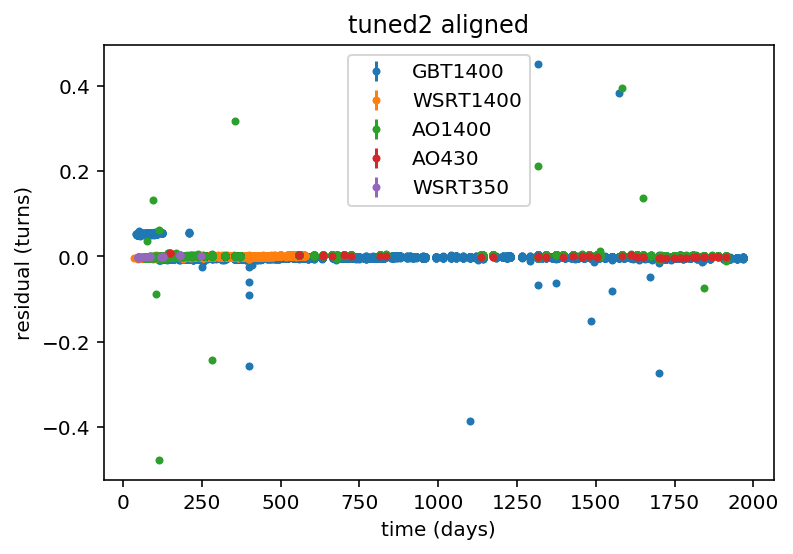

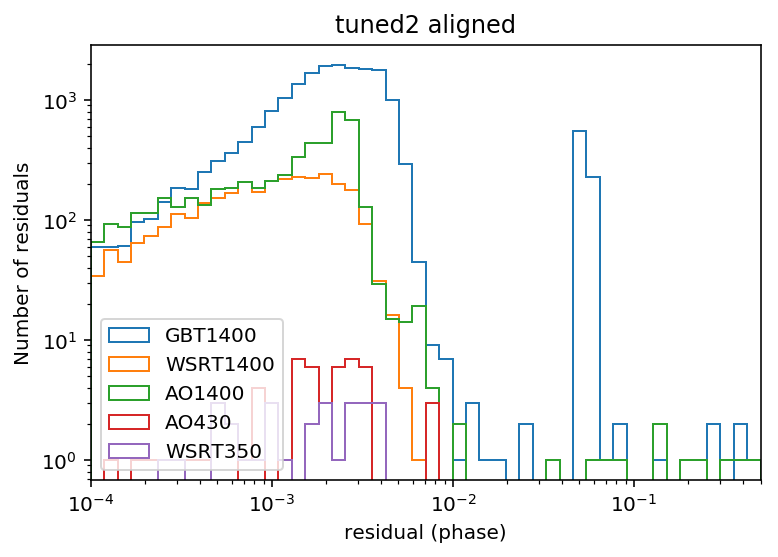

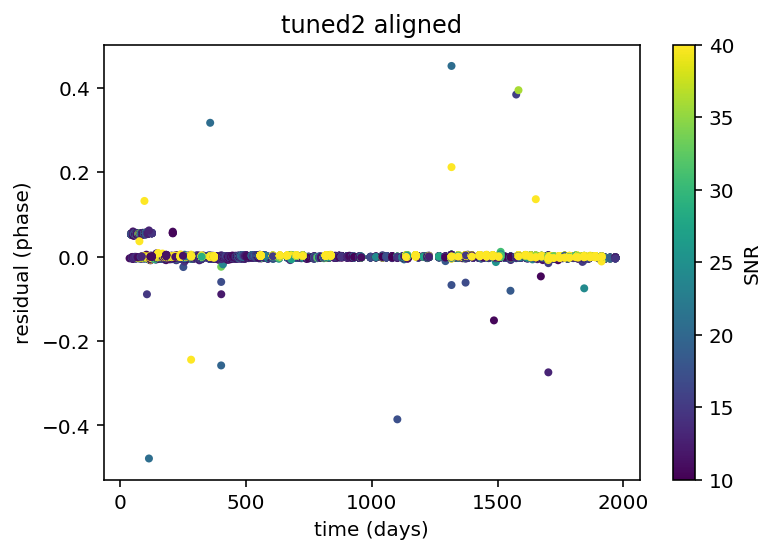

In [339]:
plt.figure(1)
plt.figure(2)
plt.figure(3)

cm = plt.get_cmap("viridis")
cNorm  = matplotlib.colors.Normalize(vmin=10, vmax=40)
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap=cm)

def key(t):
    return t["flags"]["tel"], int(t["flags"]["band"])
def wrap(a,center=0):
    return (a+0.5-center) % 1 - 0.5 + center
def fmtk(k):
    return "%s%s" % k
subsets = {}
snrs = np.zeros(len(toa_info))

be = 10**np.linspace(np.log10(1e-4),np.log10(0.5),50+1)

for i,t in enumerate(toa_info):
    k = key(t)
    if k not in subsets:
        subsets[k] = np.zeros(len(toa_info),dtype=bool)
    snr = float(t["flags"]["snr"])
    snrs[i] = snr
    if snr>10:
        subsets[k][i] = True

for k,c in subsets.items():
    if not np.any(c):
        print "nothing for", k
        continue
    m = wrap(scipy.stats.circmean(res[c], high=1))
    print k, m
    r = wrap(res[c],m)
    plt.figure(1)
    plt.errorbar(F.mjds[c], r, F.uncerts[c], linestyle="none", marker=".", label=fmtk(k))
    plt.figure(2)
    plt.hist(np.abs(r-m),histtype="step",range=(0,0.5),bins=be, label=fmtk(k))
    plt.figure(3)
    #colors = [scalarMap.to_rgba(s) for s in snrs[c]]
    plt.scatter(F.mjds[c], r-m, marker=".", c=snrs[c], vmin=10, vmax=40)
    
plt.figure(1)
plt.legend(loc="best")
plt.xlabel("time (days)")
plt.ylabel("residual (turns)")
plt.title("%s %s" % (toa_info[0]["flags"]["processing_name"],toa_info[0]["flags"]["toa_name"]))
plt.savefig("outliers-raw.pdf")
plt.figure(2)
plt.xlim(be[0],be[-1])
plt.legend(loc="lower left")
plt.gca().set_yscale('log',nonposy='clip')
plt.gca().set_xscale('log')             
plt.xlabel("residual (phase)")
plt.ylabel("Number of residuals")
plt.title("%s %s" % (toa_info[0]["flags"]["processing_name"],toa_info[0]["flags"]["toa_name"]))
plt.savefig("outliers-dist.pdf")
plt.figure(3)
plt.title("%s %s" % (toa_info[0]["flags"]["processing_name"],toa_info[0]["flags"]["toa_name"]))
plt.xlabel("time (days)")
plt.ylabel("residual (phase)")
plt.colorbar(label="SNR")
plt.savefig("outliers-snr.pdf")



In [340]:
masks = {}
ix_inv = np.argsort(F.ix)
for (i,t) in enumerate(toa_info):
    k = key(t)
    if k not in masks:
        masks[k] = np.zeros(len(toa_info), dtype=bool)
    i_array = ix_inv[i] # FIXME: this or inverse?
    f = t["flags"]
    if float(f["snr"])<10:
        continue
    if "mode" in f and f["mode"]=="search":
        continue
    masks[k][i_array] = True


In [341]:
means = {}
for k, c in masks.items():
    m = wrap(scipy.stats.circmean(res[c], high=1))
    print k, m, np.sum(c)
    means[k] = m

('AO', 350) nan 0
('GBT', 1400) -0.00271990854626 18691
('WSRT', 1400) 9.2888356658e-05 3271
('AO', 1400) 0.000536634854139 5573
('AO', 430) -0.00016569708894 54
('WSRT', 350) -0.000122233526056 29


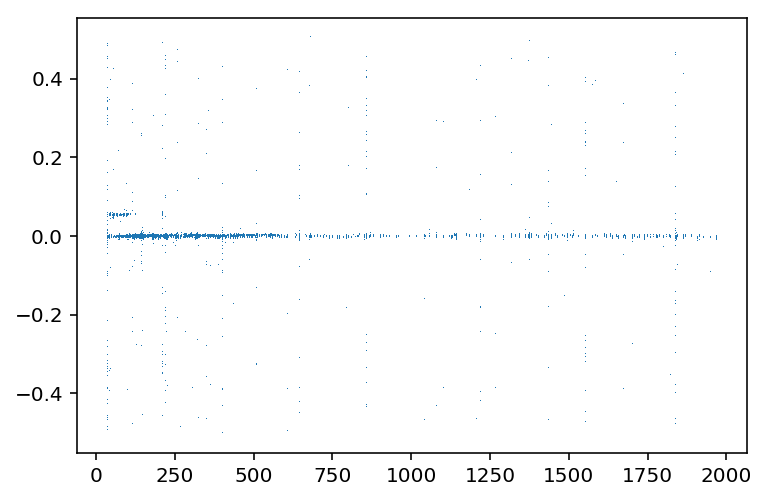

In [342]:
r = F.residuals(F.best_parameters)
plt.plot(F.mjds, r, ",")

In [343]:

for (i,t) in enumerate(toa_info):
    k = key(t)
    i_array = ix_inv[i] # FIXME: this or inverse?
    if np.isnan(means[k]):
        dp = 0
    else:
        dp = np.round(r[i_array]-means[k])
    if dp!=0:
        print r[i_array]-means[k], t["mjd"]
    F.pulses[i_array] += dp
    t["flags"]["pn"] = str(F.pulses[i_array])

0.505323855108 56599.2276279


In [344]:
threebody.write_t2_toas("%s_%s_pulses.tim"
                        % (processing_name, toa_name),
                        toa_info)

In [345]:
clean_toa_info = []
for t in toa_info:
    k = key(t)
    f = t["flags"]
    if float(f["snr"])<10:
        continue
    if "mode" in f and f["mode"]=="search":
        continue
    clean_toa_info.append(t)
threebody.write_t2_toas("%s_%s_pulses_selected.tim"
                        % (processing_name, toa_name),
                        clean_toa_info)
print len(clean_toa_info), len(toa_info)

27618 33971


In [346]:
toa_info_1400 = []
for t in clean_toa_info:
    k = key(t)
    f = t["flags"]
    if t["freq"]<1000:
        continue
    toa_info_1400.append(t)
threebody.write_t2_toas("%s_%s_pulses_1400.tim"
                        % (processing_name, toa_name),
                        toa_info_1400)
print len(toa_info_1400), len(clean_toa_info), len(toa_info)

27535 27618 33971


## Check out cleaned-up tim file

In [347]:
fpickle = "forecaster_params.pickle"
d = pickle.load(open(fpickle,"rb"))
d["files"] = ("%s_%s_pulses_1400"
                        % (processing_name, toa_name))
d["toa_mode"] = "pipeline"
Fc = threebody.Fitter(**d)
Fc.best_parameters = best_parameters
d

INFO:threebody:tempo2 output appears to be old, deleting to trigger recomputation


{'efac': 1,
 'files': 'tuned2_aligned_pulses_1400',
 'fit_pm': True,
 'fit_pos': True,
 'fit_px': True,
 'general': True,
 'kopeikin': False,
 'linear_dm': True,
 'linear_jumps': True,
 'matrix_mode': 0,
 'only_tels': None,
 'parfile': '0337_tempo2_px_optical.par',
 'ppn_mode': 'GR',
 'priors': (),
 'reference_f0': 365.95336876828094,
 'shapiro': True,
 'special': True,
 't2_astrometry': True,
 'toa_mode': 'pipeline',
 'tol': 1e-16,
 'tzrmjd_middle': 'auto',
 'use_quad': False}

27535


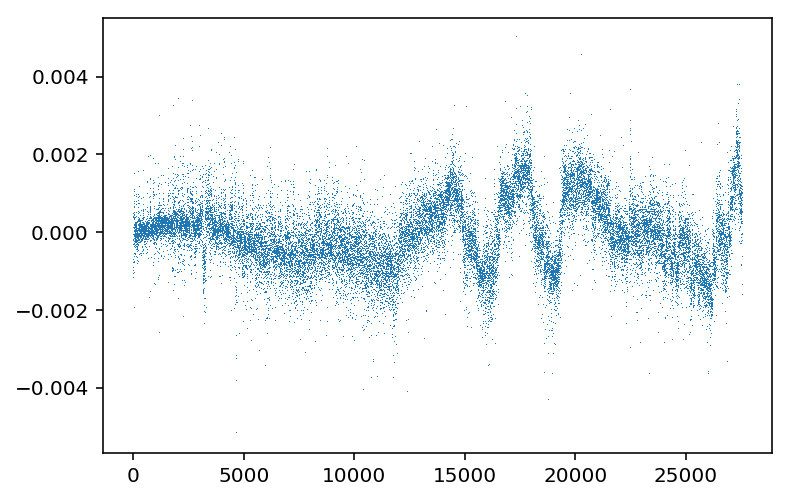

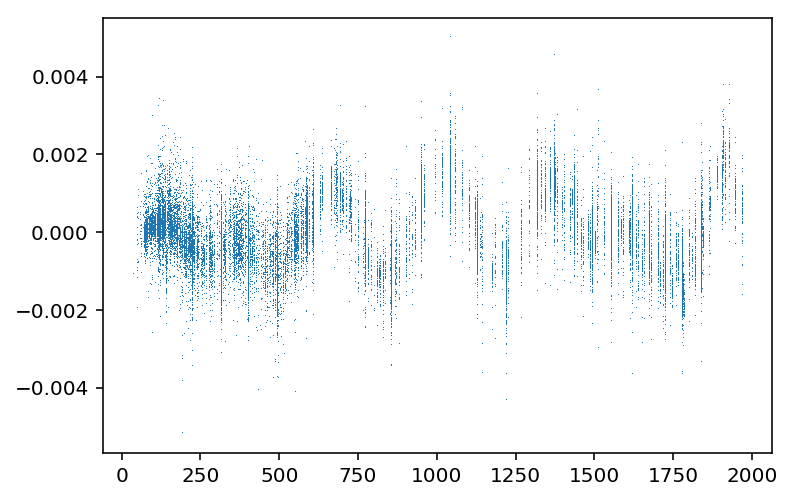

In [348]:
r = Fc.residuals(bp_clean)
res = r
plt.plot(res, ",")
plt.figure()
plt.plot(Fc.mjds, res, ",")
print len(res)